# ECMWF (IFS and AIFS)

This tutorial demonstrates how to access the ECMWF Open Data Integrated Forecast System (IFS) and Artifical Intelligence IFS (AIFS). This data is freely available from ECMWF in GRIB2 format ([👀 Read more ](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS)).

> "The data that are becoming available are based on a range of high-resolution forecasts (HRES – 9 km horizontal resolution) and ensemble forecasts (ENS – 18 km horizontal resolution).  
> \- [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2022/ecmwf-makes-wide-range-data-openly-available)

> 29 February 2024: Update from 0.4 degree resolution to 0.25 degree resolution  
> \- [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2024/ecmwf-releases-much-larger-open-dataset)

## Data Availability

- **Jan 18, 2023**, IFS 0.4 degree resolution first available
- **Feb 1, 2024** IFS 0.25 degree resolution first available
- **Feb 1, 2024** AIFS 0.25 degree resolution first available
- **May ?, 2024** IFS 0.4 degree discontinued.

### Model Types

ECMWF provides data for two different models

1. `model="ifs"` ECMWF Integrated Forecast System
1. `model="aifs"` ECMWF Artificial Intelligence Integrated Forecast System

### Data Source

| `prioriy=` | Data source                                                                  | Archive Duration      |
| ---------- | ---------------------------------------------------------------------------- | --------------------- |
| `"ecmwf"`  | [ECMWF Open Data Server](https://data.ecmwf.int/forecasts/)                  | last 4 days           |
| `"azure"`  | [Microsoft Azure](https://ai4edataeuwest.blob.core.windows.net/ecmwf)        | 2022-01-21 to present |
| `"aws"`    | [Amazon Web Services](https://ecmwf-forecasts.s3.eu-central-1.amazonaws.com) | 2023-01-18 to present |

### Products

> Note: the `aifs` only has the `oper` product.

| `product=` | Product Description                                                                                 | Available model runs       |
| ---------- | --------------------------------------------------------------------------------------------------- | -------------------------- |
| `"oper"`   | operational high-resolution forecast, atmospheric fields                                            | `00z`, `12z`,              |
| `"wave"`   | wave forecasts                                                                                      | `00z`, `12z`,              |
| `"scda"`   | short cut-off high-resolution forecast, atmospheric fields (also known a high-frequency products)", | `06z`, `18z`               |
| `"scwv"`   | short cut-off high-resolution forecast, ocean wave fields (also known a high-frequency products)",  | `06z`, `18z`               |
| `"enfo"`   | ensemble forecast, atmospheric fields                                                               | `00z`, `06z`, `12z`, `18z` |
| `"waef"`   | ensemble forecast, ocean wave fields,                                                               | `00z`, `06z`, `12z`, `18z` |
| `"mmsf"`   | multi-model seasonal forecasts fields from the ECMWF model only.                                    | ?                          |

**Model initialized** at 00z, 06z, 12z, 18z, but not all products are available every hour.


In [1]:
from herbie import Herbie

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from paint.standard2 import cm_tmp, cm_wind, cm_wave_height
from toolbox import EasyMap, pc

## Integrated Forecast System (IFS)

IFS data is only available at 0.4 degree prior to February 1, 2024. After that date, the IFS is available at 0.25 degree resolution.


In [9]:
H = Herbie("2024-03-1", model="ifs", product="oper", fxx=12)

H.grib, H.idx

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


('https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2',
 'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.index')

In [10]:
# Show the inventory
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,798588,0-798588,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,tp,NaN,sfc,NaN,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
1,2,798588,1327999,798588-1327999,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,r,500,pl,NaN,g,0001,od,fc,oper,:r:500:pl:g:0001:od:fc:oper
2,3,1327999,1817293,1327999-1817293,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,gh,850,pl,NaN,g,0001,od,fc,oper,:gh:850:pl:g:0001:od:fc:oper
3,4,1817293,2534675,1817293-2534675,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,u,925,pl,NaN,g,0001,od,fc,oper,:u:925:pl:g:0001:od:fc:oper
4,5,2534675,3268614,2534675-3268614,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,v,925,pl,NaN,g,0001,od,fc,oper,:v:925:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,58285210,59656192,58285210-59656192,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,250,pl,NaN,g,0001,od,fc,oper,:d:250:pl:g:0001:od:fc:oper
79,80,59656192,59759143,59656192-59759143,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,ro,NaN,sfc,NaN,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,81,59759143,61078909,59759143-61078909,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,vo,250,pl,NaN,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
81,82,61078909,62399470,61078909-62399470,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,50,pl,NaN,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [14]:
# Show just 10-m U and V wind
H.inventory(":10[u|v]:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
46,47,28201794,29068335,28201794-29068335,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,10u,NaN,sfc,NaN,g,0001,od,fc,oper,:10u:sfc:g:0001:od:fc:oper
47,48,29068335,29928681,29068335-29928681,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,10v,NaN,sfc,NaN,g,0001,od,fc,oper,:10v:sfc:g:0001:od:fc:oper


In [16]:
# Get 2-m temperature as an xarray Dataset
ds = H.xarray(":2t:", verbose=True)
ds

📇 Download subset: ▌▌Herbie IFS model oper product initialized 2024-Mar-01 00:00 UTC F12 ┊ source=azure                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2
Found 1 grib messages.
Download subset group 1
  41  :2t:sfc:g:0001:od:fc:oper
curl -s --range 24427114-25090915 "https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2" > "/home/blaylock/data/ifs/20240301/subset_e0127a9f__20240301000000-12h-oper-fc.grib2"
💾 Saved the subset to /home/blaylock/data/ifs/20240301/subset_e0127a9f__20240301000000-12h-oper-fc.grib2


<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 2024-03-01
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 2024-03-01T12:00:00
Data variables:
    t2m                  (latitude, longitude) float32 244.9 244.9 ... 224.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0127a9f...
    search:            :2t:

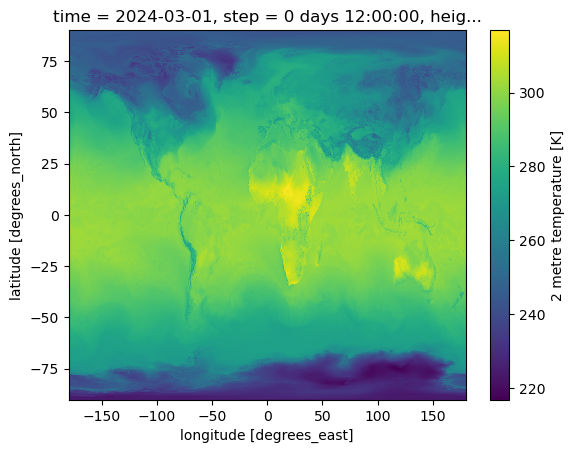

In [18]:
ds.t2m.plot()

### 0.4 degree IFS

Again, the 0.4 degree IFS was available starting January 2023, but will be discontinued in May 2024 in favor of the 0.25 degree data. You can still access these files as long as they exist.


In [20]:
# Accessing historical
H = Herbie("2023-07-04", model="ifs", product="oper", fxx=12)
H.grib

✅ Found ┊ model=ifs ┊ product=oper ┊ 2023-Jul-04 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20230704/00z/0p4-beta/oper/20230704000000-12h-oper-fc.grib2'

## Unique Index Files

The ECMWF index files are different than the wgrib2-style index files, so pay close attention to how you should select the field you want.


In [22]:
H = Herbie("2024-03-1", model="ifs", product="oper", fxx=12)

# Show the search_help
print(H.search_help)

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure

Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `search`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
search (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence (all levels)
":gh:"                   geopotential height (all levels)
":gh:500"                geopotential height only at 500 hPa
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"       

When considering search queries, pay attention to the "search_this" column; that columns is used for the regex search.


In [23]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,798588,0-798588,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,tp,NaN,sfc,NaN,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
1,2,798588,1327999,798588-1327999,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,r,500,pl,NaN,g,0001,od,fc,oper,:r:500:pl:g:0001:od:fc:oper
2,3,1327999,1817293,1327999-1817293,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,gh,850,pl,NaN,g,0001,od,fc,oper,:gh:850:pl:g:0001:od:fc:oper
3,4,1817293,2534675,1817293-2534675,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,u,925,pl,NaN,g,0001,od,fc,oper,:u:925:pl:g:0001:od:fc:oper
4,5,2534675,3268614,2534675-3268614,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,v,925,pl,NaN,g,0001,od,fc,oper,:v:925:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,58285210,59656192,58285210-59656192,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,250,pl,NaN,g,0001,od,fc,oper,:d:250:pl:g:0001:od:fc:oper
79,80,59656192,59759143,59656192-59759143,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,ro,NaN,sfc,NaN,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,81,59759143,61078909,59759143-61078909,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,vo,250,pl,NaN,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
81,82,61078909,62399470,61078909-62399470,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,50,pl,NaN,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


Ok, now that we have some understanding of the index file, we can read the 2-m temperature data.


In [24]:
ds = H.xarray(":2t:")
ds

<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 2024-03-01
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 2024-03-01T12:00:00
Data variables:
    t2m                  (latitude, longitude) float32 244.9 244.9 ... 224.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0127a9f...
    search:            :2t:

Text(1.0, 1.0, '2 metre temperature')

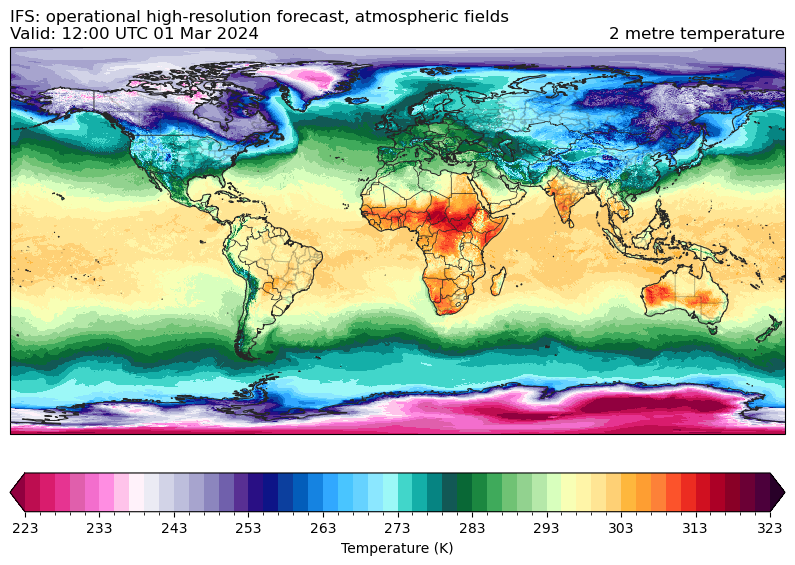

In [25]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

Now the same, but for wind.


In [27]:
H = Herbie("2024-03-01", model="ifs", product="oper")

# Get u and v wind component
ds = H.xarray(":10[u|v]:")

# Compute the wind speed
ds["spd"] = np.sqrt(ds["u10"] ** 2 + ds["v10"] ** 2)

# without too much thought, just quickly copy attributes
ds["spd"].attrs = ds["u10"].attrs.copy()
ds["spd"].attrs["standard_name"] = "wind_speed"
ds["spd"].attrs["long_name"] = "10 m wind speed"
ds["spd"].attrs["GRIB_name"] = "10 m Wind Speed"

ds

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 2024-03-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 2024-03-01
Data variables:
    u10                  (latitude, longitude) float32 1.654 1.654 ... -1.237
    v10                  (latitude, longitude) float32 0.9546 0.9546 ... 2.361
    gribfile_projection  object None
    spd                  (latitude, longitude) float32 1.909 1.909 ... 2.665
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0ef1f8f...
    search:            :10[u|v]:

Text(1.0, 1.0, '10 m Wind Speed')

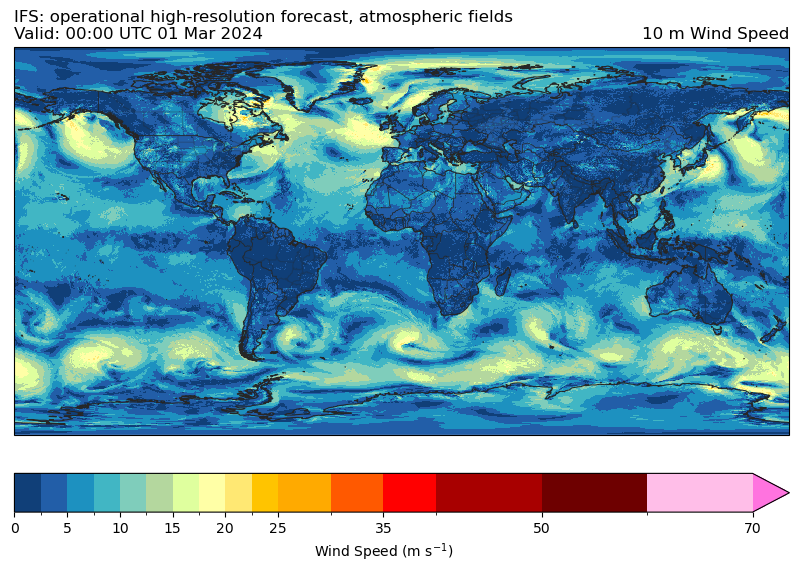

In [28]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.spd, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.spd.GRIB_name, loc="right")

Now lets get the humidity and geopotential height at 500 hPa


In [29]:
ds = H.xarray(":(?:q|gh):500")
ds

<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 2024-03-01
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 2024-03-01
Data variables:
    q                    (latitude, longitude) float32 0.0001736 ... 0.0001869
    gh                   (latitude, longitude) float32 5.196e+03 ... 4.895e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0efbf07...
    search:            :(?:q|gh):500

Text(1.0, 1.0, '500.0 hPa\nSpecific humidity/Geopotential height')

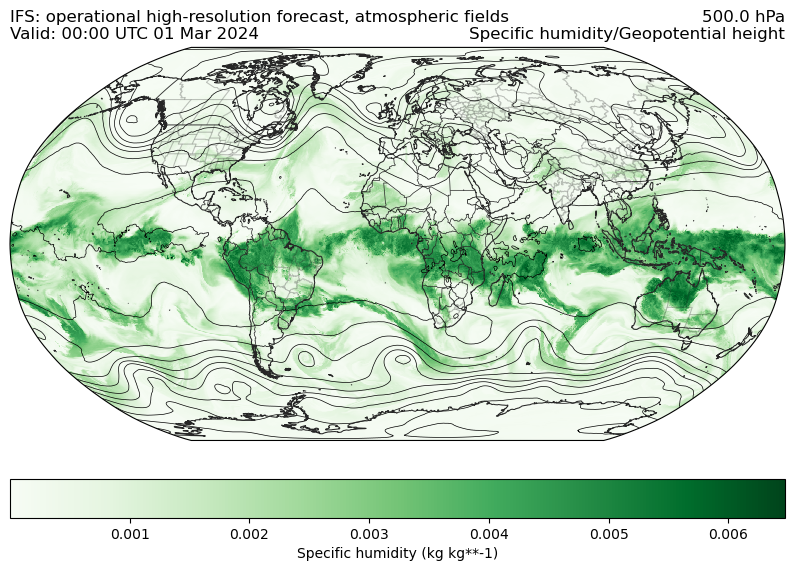

In [30]:
ax = EasyMap("50m", crs=ccrs.Robinson(), figsize=[10, 10]).STATES().BORDERS().ax

# Color shade by specific humidity
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.q, transform=pc, cmap="Greens")

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    label=f"{ds.q.GRIB_name} ({ds.q.units})",
)

# Contours for geopotential height
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    transform=pc,
    colors="k",
    linewidths=0.5,
    levels=range(0, 10_000, 60 * 2),
)


ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(
    f"{ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}\n{ds.q.GRIB_name}/{ds.gh.GRIB_name}",
    loc="right",
)

## ECMWF IFS Wave Output


In [31]:
H = Herbie("2022-01-26 00:00", model="ifs", product="wave")

✅ Found ┊ model=ifs ┊ product=wave ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


In [32]:
ds = H.xarray(None, verbose=True)
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1101: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


👨🏻‍🏭 Created directory: [/home/blaylock/data/ifs/20220126]
✅ Success! Downloaded IFS from azure               
	src: https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/wave/20220126000000-0h-wave-fc.grib2
	dst: /home/blaylock/data/ifs/20220126/20220126000000-0h-wave-fc.grib2


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    mp2                  (latitude, longitude) float32 ...
    swh                  (latitude, longitude) float32 ...
    mwd                  (latitude, longitude) float32 ...
    pp1d                 (latitude, longitude) float32 ...
    mwp                  (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 wave
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             /home/blaylock/data/ifs/20220126/20220126000000-...
    local_grib:              /home/blaylock/data/ifs/20220126/20220126000000-...
    search:            None

Text(1.0, 1.0, 'Significant height of combined wind waves and swell')

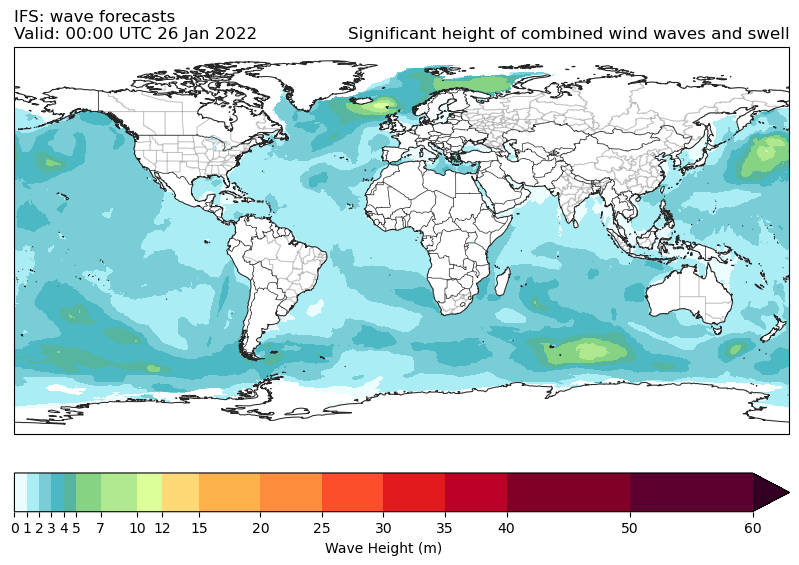

In [33]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.swh,
    transform=pc,
    **cm_wave_height(units="m").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    **cm_wave_height(units="m").cbar_kwargs,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.swh.GRIB_name, loc="right")

## Ensemble Forecast Products


In [24]:
H = Herbie("2022-01-26 00:00", model="ifs", product="enfo")
ds = H.xarray(":2t:")
ds

/tmp/ipykernel_16619/1920808957.py:1: DeprecationWarning: `model='ecmwf'`is deprecated. Please use model='ifs' instead. Also, did you know you can also access `model='aifs'` too!
  H = Herbie("2022-01-26 00:00", model="ecmwf", product="enfo")


✅ Found ┊ model=ifs ┊ product=enfo ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.


[<xarray.Dataset>
 Dimensions:              (number: 50, latitude: 451, longitude: 900)
 Coordinates:
   * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
     time                 datetime64[ns] 2022-01-26
     step                 timedelta64[ns] 00:00:00
     heightAboveGround    float64 2.0
   * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
   * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
     valid_time           datetime64[ns] 2022-01-26
 Data variables:
     t2m                  (number, latitude, longitude) float32 246.5 ... 246.2
     gribfile_projection  object None
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     model:        

In [ ]:
# Dataset with all 50 members
ds[0]

In [ ]:
# This Dataset is of the mean of all the members, right?
ds[1]

In [ ]:
H.idx

## Ensemble Wave Products


In [ ]:
H = Herbie("2022-01-26 00:00", model="ecmwf", product="waef")
ds = H.xarray(None)
ds

In [ ]:
len(ds)

In [ ]:
ds[0]

In [ ]:
ds[1]

In [ ]:
H = Herbie("2022-01-26", model="ecmwf", product="enfo")
H.inventory()

Here is another examle, just for fun


In [ ]:
H = Herbie("2022-01-26", model="ecmwf", product="oper", fxx=12)

In [ ]:
# Download the full grib2 file
H.download()

In [ ]:
# Download just the 10-m u and v winds
H.download(search=":10(u|v):")

In [ ]:
# Retrieve the 500 hPa temperature as an xarray.Dataset
ds = H.xarray(search=":t:500:")

In [ ]:
ds

In [ ]:
ds.t.plot()

## Artificial Intelligence IFS

For some reason, the GRIB file isn't read in as a grid, but as a single vector of values. This can be reshaped.

If someone else figures out how to reshape the AIFS data, please let me know and open a pull request to demonstrate. I'll probably get to this someday, but not tonight.


In [2]:
H = Herbie("2024-03-1", model="aifs", product="oper", fxx=12)

H.grib, H.idx

✅ Found ┊ model=aifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


('https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/aifs/0p25/oper/20240301000000-12h-oper-fc.grib2',
 'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/aifs/0p25/oper/20240301000000-12h-oper-fc.index')

In [3]:
H.inventory(":t:850")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
28,29,17487379,18085712,17487379-18085712,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,t,850,pl,NaN,g,0001,ai,fc,oper,:t:850:pl:g:0001:ai:fc:oper


In [4]:
ds = H.xarray(":t:850")
ds

<xarray.Dataset>
Dimensions:              (values: 542080)
Coordinates:
    time                 datetime64[ns] 2024-03-01
    step                 timedelta64[ns] 12:00:00
    isobaricInhPa        float64 850.0
    latitude             (values) float64 89.78 89.78 89.78 ... -89.78 -89.78
    longitude            (values) float64 0.0 20.0 40.0 ... 300.0 320.0 340.0
    valid_time           datetime64[ns] 2024-03-01T12:00:00
Dimensions without coordinates: values
Data variables:
    t                    (values) float32 251.8 251.9 252.1 ... 241.6 241.8
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   aifs
    product:                 oper
    description:             ECMWF Open Data - Artificial Inteligence Integra...
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/aifs/20240301/subset_e012fc9...
    search:            :t:850

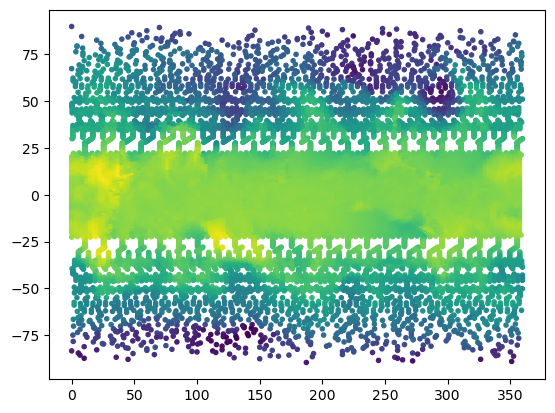

In [6]:
import matplotlib.pyplot as plt

ds_thinned = ds.thin(50)

plt.scatter(ds_thinned.longitude, ds_thinned.latitude, c=ds_thinned.t, marker=".")

---

**[Attribution](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time#ECMWFOpenDataRealTime-Attribution)**

- Copyright statement: Copyright "© 2022 European Centre for Medium-Range Weather Forecasts (ECMWF)".
- Source www.ecmwf.int
- Licence Statement: This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
- Disclaimer: ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.
